# Q1
- A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units.
- A randomly selected sample of cutlets was collected from both units and measured?
- Analyze the data and draw inferences at 5% significance level.
- Please state the assumptions and tests that you carried out to check validity of the assumptions.
- Minitab File : Cutlets.mtw

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

- Significance = 5%
- Alpha = 0.05

- As it is a two-tailed test
- Alpha/2 = 0.025

In [2]:
Cutlets = pd.read_csv("D:\Data Science Assignments\Hypothesis Testing\Cutlets.csv")
Cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
# Descriptive Statistics #
Cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
# Null Values #
Cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [5]:
# Duplicate values #
Cutlets[Cutlets.duplicated()].shape

(0, 2)

In [6]:
Cutlets[Cutlets.duplicated()]

,Unit A,Unit B


In [7]:
# Data Type #
Cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


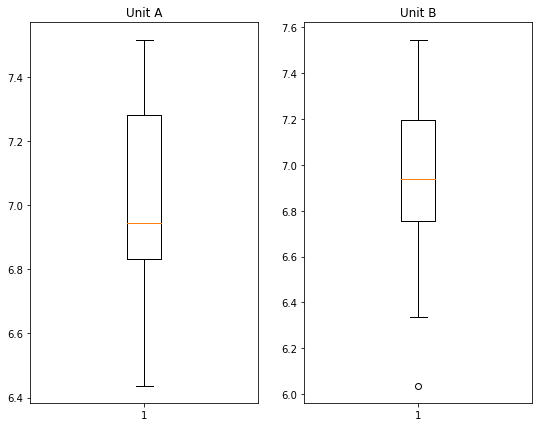

In [8]:
# Plotting the Data #
plt.subplots(figsize = (9,7))
plt.subplot(121)
plt.boxplot(Cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(Cutlets['Unit B'])
plt.title('Unit B')
plt.show()

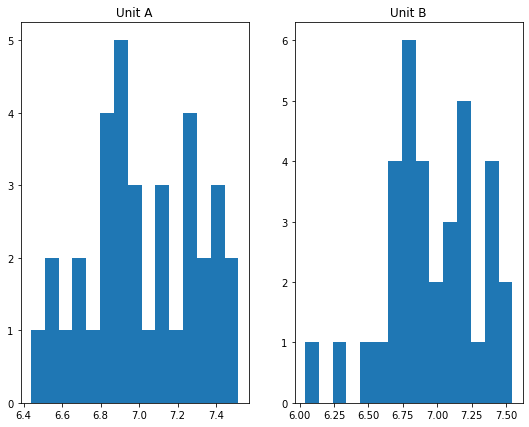

In [9]:
plt.subplots(figsize = (9,7))
plt.subplot(121)
plt.hist(Cutlets['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(Cutlets['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

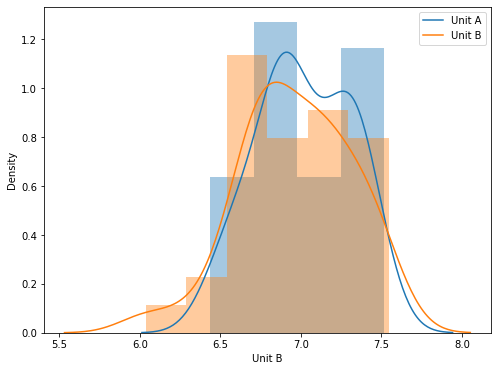

In [10]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(Cutlets['Unit A'], kde = True)
sns.distplot(Cutlets['Unit B'],hist = True)
plt.legend(labels)

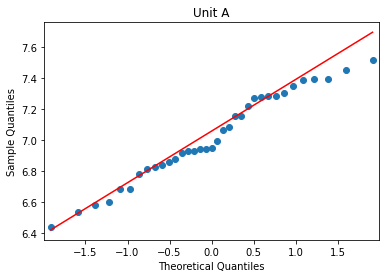

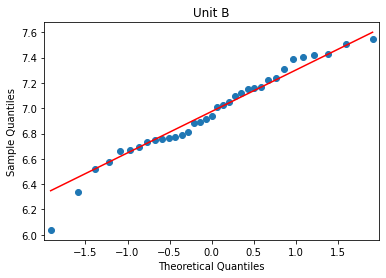

In [11]:
sm.qqplot(Cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(Cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [12]:
# Hypothesis using t-statistics #
statistic , p_value = stats.ttest_ind(Cutlets['Unit A'],Cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


- If p_value is not equal to alpha
- we failed to reject Null Hypothesis
- If p_value is equal to alpha
- we reject Null Hypothesis

In [13]:
# Interpreting p_value #
alpha = 0.025
print('Significance=%.3f , p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject null hypothesis')

Significance=0.025 , p=0.472
We fail to reject null hypothesis


Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# Q2
- A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list.
- They collected a random sample and recorded TAT for reports of 4 laboratories.
- TAT is defined as sample collected to report dispatch.

- Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level

- Minitab File : LabTAT.mtw

In [14]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
LabTAT = pd.read_csv("D:\Data Science Assignments\Hypothesis Testing\LabTAT.csv")
LabTAT

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [16]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
LabTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
stats.f_oneway(LabTAT.iloc[0:,0],LabTAT.iloc[0:,1],LabTAT.iloc[0:,2],LabTAT.iloc[0:,3])


F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

- p_value is greater than 0.05 so choose null hypothesis and reject alternate hypothesis

array([[<AxesSubplot:title={'center':'Laboratory 4'}>]], dtype=object)

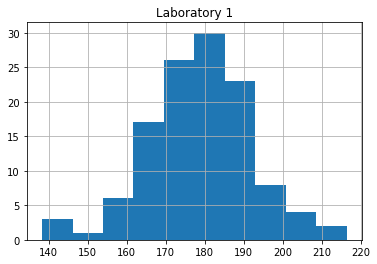

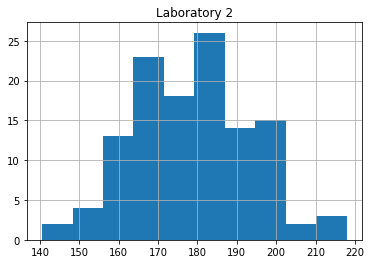

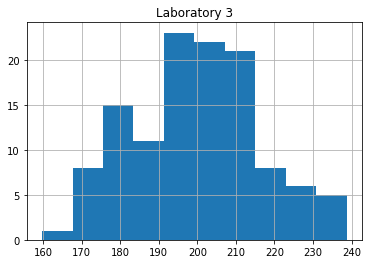

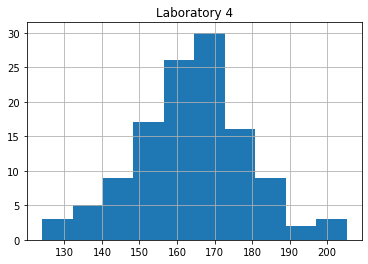

In [19]:
LabTAT.hist(["Laboratory 1"])
LabTAT.hist(["Laboratory 2"])
LabTAT.hist(["Laboratory 3"])
LabTAT.hist(["Laboratory 4"])

<AxesSubplot:>

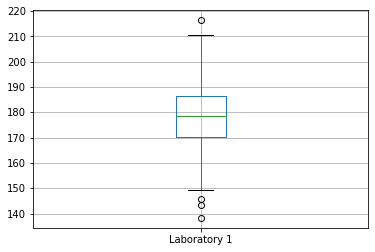

In [20]:
LabTAT.boxplot(["Laboratory 1"])

<AxesSubplot:>

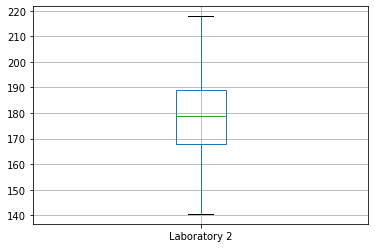

In [21]:
LabTAT.boxplot(["Laboratory 2"])

<AxesSubplot:>

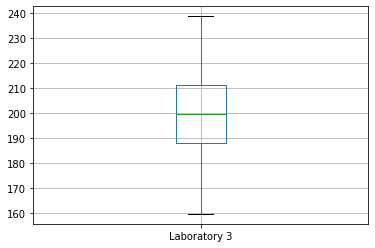

In [22]:
LabTAT.boxplot(["Laboratory 3"])

<AxesSubplot:>

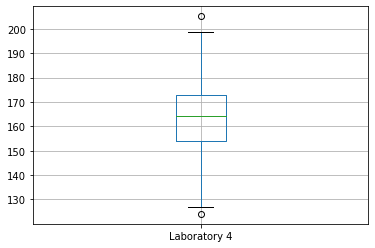

In [23]:
LabTAT.boxplot(["Laboratory 4"])

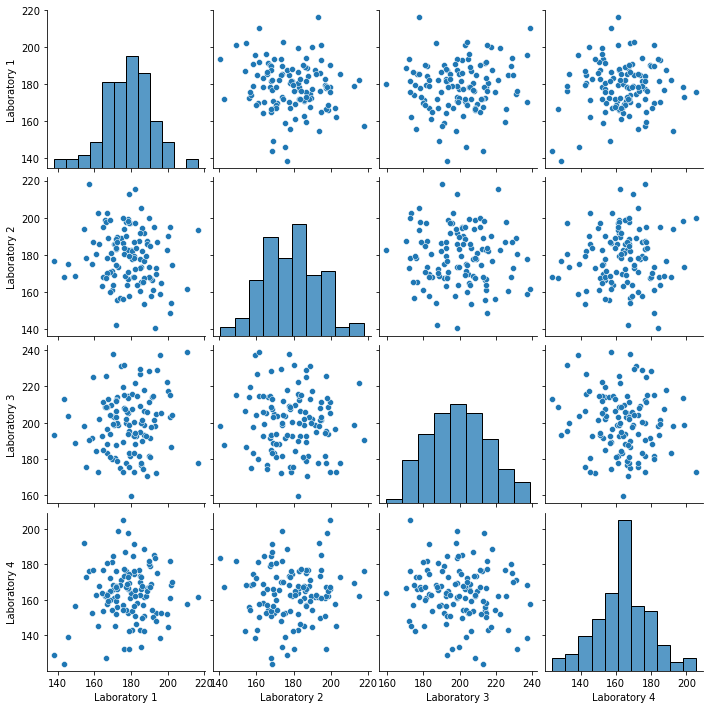

In [24]:
sns.pairplot(LabTAT)
plt.show()

# Q3
- Sales of products in four different regions is tabulated for males and females
- Find if male/female buyer ratios are similar across regions
- Ho = All proportions are equal
- Ha = Not all proportions are equal
- Check p_value
- If p_value < alpha we reject null hypothesis
- Minitab File : Buyer Ratio.mtw

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
import warnings
warnings.filterwarnings("ignore")

In [26]:
Buyerratio = pd.read_csv("D:\Data Science Assignments\Hypothesis Testing\BuyerRatio.csv")
Buyerratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [27]:
Buyer_ratio=Buyerratio.iloc[:,1:6]
Buyer_ratio

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [28]:
Buyer_ratio.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [29]:
val=stats.chi2_contingency(Buyer_ratio)
val

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [30]:
no_of_rows=len(Buyer_ratio.iloc[0:2,0])
no_of_columns=len(Buyer_ratio.iloc[0,0:4])
degree_of_f=(no_of_rows-1)*(no_of_columns-1)
print('Degree of Freedom=',degree_of_f)

Degree of Freedom= 3


In [31]:
Expected_value=val[3]

In [32]:
Expected_value

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [33]:
chi_square=sum([(o-e)**2/e for o,e in zip(Buyer_ratio.values,Expected_value)])
chi_square_statestic=chi_square[0]+chi_square[1]
chi_square_statestic

1.5152956451130446

In [34]:
critical_value=chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [35]:
if chi_square_statestic >= critical_value:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [36]:
pvalue=1-chi2.cdf(chi_square_statestic,3)
pvalue

0.6787446296467897

In [37]:
if pvalue <= 0.05:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


# Q4
- TeleCall uses 4 centers around the globe to process customer order forms.
- They audit a certain %  of the customer order forms.
- Any error in order form renders it defective and has to be reworked before processing.
- The manager wants to check whether the defective %  varies by centre.
- Please analyze the data at 5% significance level and help the manager draw appropriate inferences
- Minitab File: CustomerOrderForm.mtw


In [38]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import warnings
warnings.filterwarnings("ignore")

In [39]:
CustomerOrderForm = pd.read_csv("D:\Data Science Assignments\Hypothesis Testing\Costomer+OrderForm.csv")
CustomerOrderForm

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [40]:
CustomerOrderForm.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [41]:
CustomerOrderForm.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [42]:
CustomerOrderForm.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [43]:
CustomerOrderForm.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [44]:
CustomerOrderForm.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [45]:
data = np.array([[271,267,269,280],[29,33,31,20]])
data

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [46]:
stat, p, dof, expected = chi2_contingency(data)

In [47]:
stat

3.858960685820355

In [48]:
p

0.2771020991233135

In [49]:
print('dof=%d'% dof)
print(expected)

dof=3
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [50]:
alpha = 0.05
prob=1-alpha
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0),variables are related')
else:
    print('Independent (fail to reject H0), variables are not related')


probability=0.950, critical=7.815, stat=3.859
Independent (fail to reject H0), variables are not related


In [51]:
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.277
Independent (fail to reject H0)
